In [36]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from scipy import sparse
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [60]:
it_df = pd.read_csv('data/6_classes_no_names.csv', sep=',')


In [25]:
X = it_df['description'].to_numpy()
y = it_df['class'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=14)

In [26]:
vectorizer = TfidfVectorizer(sublinear_tf=False, max_df=0.5, max_features=42, stop_words='english')
X_train = vectorizer.fit_transform(x_train)

In [27]:
feature_names = np.array(vectorizer.get_feature_names())

target_names = [['ds'], ['mobile'],['qa'], ['web'], ['devops'], ['busorg']]

In [28]:
X_test = vectorizer.transform(x_test)

In [45]:
X = sparse.csr_matrix.toarray(X_train)
X_t = sparse.csr_matrix.toarray(X_test)

clf = HistGradientBoostingClassifier(loss='categorical_crossentropy', max_iter = 50, learning_rate=0.65, random_state=68).fit(X, y_train)
clf.score(X_t, y_test) #Return the mean accuracy on the given test data and labels

0.8461538461538461

In [47]:
#clf.predict_proba(X_t)

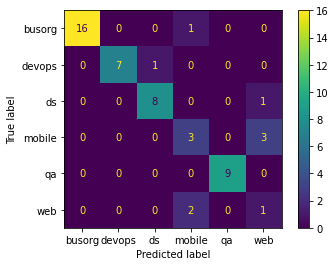

In [48]:
metrics.plot_confusion_matrix(clf, X_t, y_test)


In [59]:
scores = cross_val_score(clf, X, y_train, cv=6)
print("cross_val_score_mean: ", np.mean(scores))

cross_val_score_mean:  0.722829131652661
